## Install Packages

In [5]:
# !conda install numpy -y
# !conda config --add channels conda-forge
# !conda install mahotas -y
!conda install -c conda-forge matplotlib -y

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3/envs/py3-Ju-20-20

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    matplotlib-3.3.0           |                0           6 KB  conda-forge
    matplotlib-base-3.3.0      |   py36h534ab7b_0         6.7 MB  conda-forge
    pyparsing-2.4.7            |     pyh9f0ad1d_0          60 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         6.8 MB

The following NEW packages will be INSTALLED:

  cycler             conda-forge/noarch::cycler-0.10.0-py_2
  kiwisolver         conda-forge/osx-64::kiwisolver-1.2.0-py36h863e41a_0
  matplotlib         conda-forge/osx-64::matplotlib-3.3.0-0
  matplotlib-base    conda-forge/osx-64::matplotlib-base-3.3.0-py36h534ab7b_0
  pyparsing          con

In [6]:
!conda install -c anaconda pillow -y
!conda install -c conda-forge imread -y
!conda install -c conda-forge freeimage -y
!conda install -c anaconda opencv  -y

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3/envs/py3-Ju-20-20

  added / updated specs:
    - pillow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pillow-7.2.0               |   py36ha54b6ba_0         650 KB  anaconda
    ------------------------------------------------------------
                                           Total:         650 KB

The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2020.6.2~ --> anaconda::ca-certificates-2020.6.24-0

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-forge::certifi-2020.6.20-py36h9~ --> anaconda::certifi-2020.6.20-py36_0
  openssl            conda-forge::openssl-1.1.1g-h0b31af3_0 --> anaconda::openssl-1.1.1g-h1de35cc_0
  pillow             conda-forge::pillow-7.2.0-py36h2ae5df~ --> anaconda::pillow-7.2.0-py

## Setup

In [2]:
import numpy as np
import pylab
import mahotas as mh

import matplotlib
import matplotlib.pyplot as plt

 ## Run

In [3]:
dna = mh.imread('dna.jpeg')
cells_img = mh.imread('cells_left.png')
    #'cells_ps2048_l14_o0.png')

dna type <class 'numpy.ndarray'>
dna.shape (1024, 1344)
cells_img type <class 'numpy.ndarray'>
cells_img.shape (303, 304, 4)


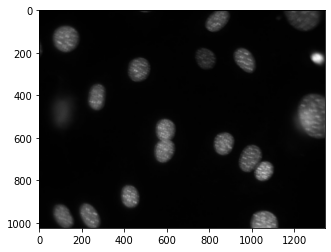

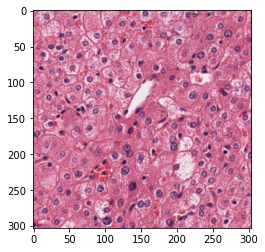

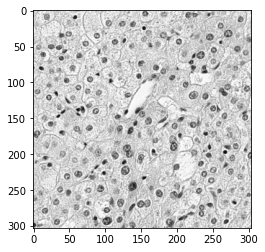

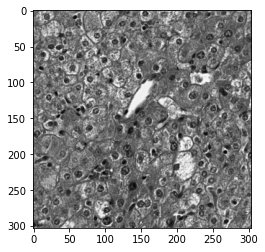

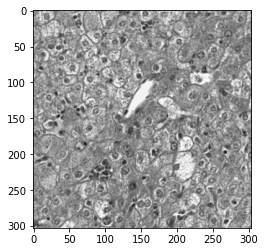

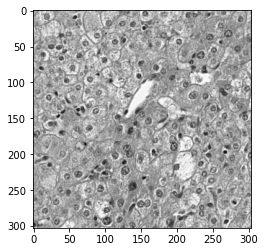

In [76]:
print('dna type', type(dna))
print('dna.shape',dna.shape)
print('cells_img type', type(cells_img))
print('cells_img.shape',cells_img.shape)
dna = dna.squeeze()
# print('dnas.shape',dnas.shape)
pylab.imshow(dna)
pylab.show()
pylab.imshow(cells_img[...,:])
pylab.show()
pylab.imshow(cells_img[...,0])
pylab.show()
pylab.imshow(cells_img[...,1])
pylab.show()
pylab.imshow(cells_img[...,2])
pylab.show()
pylab.imshow(cells_img[...,2]+.5*cells_img[...,0])
pylab.gray()
pylab.show()

In [54]:
# pylab.imshow(dna)
# pylab.gray()
# pylab.show()
print('dna.dtype', dna.dtype)
print('dna.max()',dna.max())
print('dna.min()',dna.min())

print('cells_img.dtype', cells_img.dtype)
print('cells_img.max()',cells_img.max())
print('cells_img.min()',cells_img.min())

dna.dtype uint8
dna.max() 252
dna.min() 0
cells_img.dtype uint8
cells_img.max() 255
cells_img.min() 14


## "Actual Work"

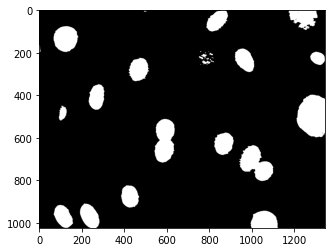

(303, 304)


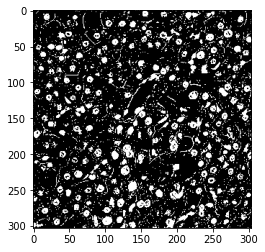

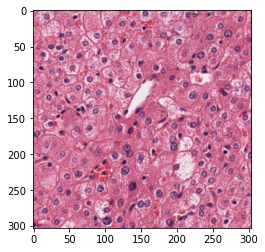

In [68]:
T = mh.thresholding.otsu(dna)
pylab.imshow(dna > T)
pylab.show()

cells_red = cells_img[...,0].squeeze()
cells_purple = ((cells_img[...,0]+cells_img[...,2]).squeeze()*.5).astype(np.uint8)
# cells_red_mid = np.absolute(cells_red.copy()-(cells_red.max()*.5)*np.ones(cells_red.shape)).astype(np.uint8)
print(cells_red.shape)
T = mh.thresholding.otsu(cells_red)
pylab.imshow(cells_red < T)
pylab.show()
pylab.imshow(cells_img[...,0:3])
pylab.show()

In [73]:
!pip install scikit-image 

     |████████████████████████████████| 12.1 MB 438 kB/s eta 0:00:01    |█▍                              | 522 kB 997 kB/s eta 0:00:12     |█▌                              | 552 kB 997 kB/s eta 0:00:12     |█████                           | 1.9 MB 997 kB/s eta 0:00:11     |██████████████████████▍         | 8.4 MB 2.1 MB/s eta 0:00:02
     |████████████████████████████████| 3.3 MB 449 kB/s eta 0:00:01     |███████████████████████████     | 2.8 MB 449 kB/s eta 0:00:02
  Using cached tifffile-2020.7.17-py3-none-any.whl (144 kB)
  Using cached networkx-2.4-py3-none-any.whl (1.6 MB)
     |████████████████████████████████| 4.3 MB 368 kB/s eta 0:00:01     |█████▋                          | 757 kB 5.1 MB/s eta 0:00:01     |████████▉                       | 1.2 MB 5.1 MB/s eta 0:00:01     |███████████████████▌            | 2.6 MB 5.1 MB/s eta 0:00:01     |████████████████████████▌       | 3.3 MB 5.1 MB/s eta 0:00:01


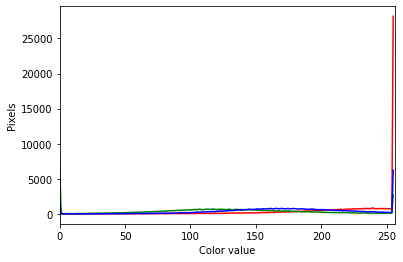

In [75]:
"""
 * Python program to create a color histogram.
 *
 * Usage: python ColorHistogram.py <filename>
"""
import sys
import skimage.io
import skimage.viewer
from matplotlib import pyplot as plt

# read original image, in full color, based on command
# line argument
image = skimage.io.imread(fname='cells_left.png')

# display the image
# viewer = skimage.viewer.Viewer(image)
# viewer.show()

# tuple to select colors of each channel line
colors = ("r", "g", "b")
channel_ids = (0, 1, 2)

# create the histogram plot, with three lines, one for
# each color
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        image[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Color value")
plt.ylabel("Pixels")

plt.show()


In [ ]:
# ### Running 8px Gause Filter over image
# dnaf = mh.gaussian_filter(dna, 8)
# #convert to unsigned 8 bit int array
# dnafint = dnaf.astype(np.uint8)
# # Find optimal threshold in image
# T = mh.thresholding.otsu(dnafint)
# # show image at thresh
# pylab.imshow(dnafint > T)
# pylab.show()

182
T 182 T2 181
(5, 5)
Filter Method 1 27
Filter Method 2 1
cells_BG_thresh_filtered nr_objects 38


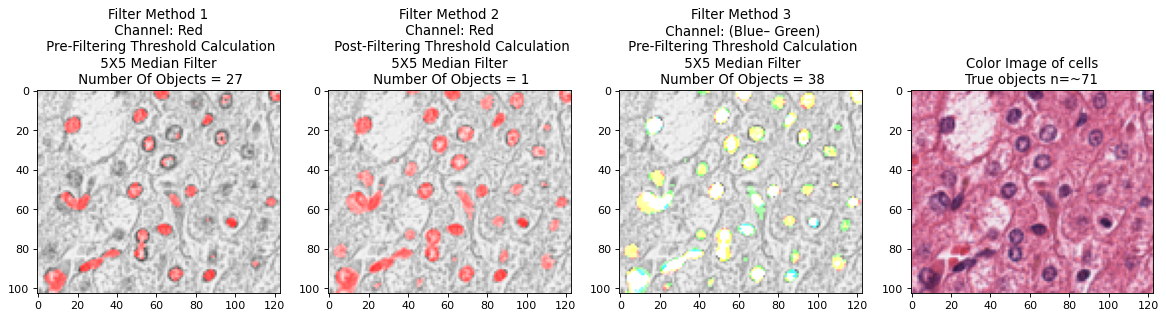

In [41]:

from skimage import filters
cells_img = mh.imread('cells_left_34.png')
# 71 nuclei in image


# Find optimal threshold in image
cells_red = cells_img[...,0].squeeze().copy()
T = mh.thresholding.otsu(cells_red)
print(T)
# show image at thresh


med_filter_cells_red = filters.median(cells_red, np.ones((5, 5)))
T2 = mh.thresholding.otsu(med_filter_cells_red)
cells_final_1 = med_filter_cells_red < (T-25)
cells_final_2 = med_filter_cells_red < (T2)
cells_raw = cells_img[...,:3].copy()

print('T',T,'T2',T2)
# def rgb2gray(rgb):
#     return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
# cells_grayscale = rgb2gray(cells_raw)
cells_redonly = cells_raw[...,0]

# Blue-Green Channel
cells_BG = cells_raw[...,2]-cells_raw[...,1]
T3 = mh.thresholding.otsu(cells_BG)
cells_BG_bias = 10
cells_BG_thresh = cells_BG >T3+cells_BG_bias
filter_med = np.ones((5, 5))
filter_med_2 = filter_med.copy()
filter_med_2[1,1] = -8
print(filter_med_2.shape)
cells_BG_thresh_filtered = filters.median(cells_BG_thresh, filter_med)


pylab.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(141)
pylab.gray()
labeled,nr_objects = mh.label(cells_final_1)
print('Filter Method 1',nr_objects)
pylab.imshow(mh.overlay(cells_redonly,cells_final_1))
pylab.title('Filter Method 1\n Channel: Red \n pre-filtering threshold calculation\n 5x5 median filter \n Number of objects = '.title()+ str(nr_objects))

# rmax = mh.regmax(cells_final_1)
# seeds,nr_nuclei = mh.label(rmax)
# print('Number of nuclei:', nr_nuclei)


plt.subplot(142)
labeled,nr_objects = mh.label(cells_final_2)
print('Filter Method 2',nr_objects)
pylab.title('Filter Method 2\n Channel: Red \n post-filtering threshold calculation\n 5x5 median filter \n Number of objects = '.title()+ str(nr_objects))
pylab.imshow(mh.overlay(cells_redonly,cells_final_2))

plt.subplot(143)
labeled,nr_objects = mh.label(cells_BG_thresh_filtered)
print('cells_BG_thresh_filtered nr_objects',nr_objects)
pylab.title('Filter Method 3\n Channel: (Blue– Green)\n pre-filtering threshold calculation\n 5x5 median filter\n Number of objects = '.title()+ str(nr_objects))
pylab.imshow(mh.overlay(cells_redonly,labeled,cells_final_2,cells_final_1))

# rmax = mh.regmax(cells_BG_thresh_filtered)
# seeds,nr_nuclei = mh.label(rmax)
# print('Number of nuclei:', nr_nuclei)


plt.subplot(144)
pylab.title('Color Image of cells'+'\n'+'True objects n=~71')
pylab.imshow(cells_img[...,0:3])
pylab.show()

nr_objects 1


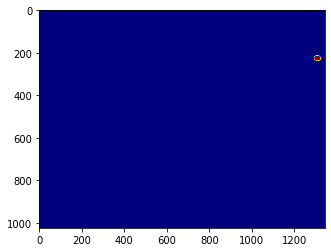

nr_objects 74


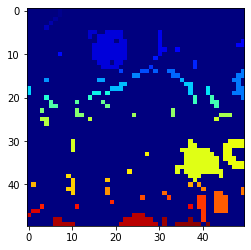

In [84]:
labeled,nr_objects = mh.label(dnafint > T)
print('nr_objects', nr_objects)
pylab.imshow(labeled)
pylab.jet()
pylab.show()

labeled,nr_objects = mh.label(cells_red[0:50,0:50] < T)
print('nr_objects', nr_objects)
pylab.imshow(labeled)
pylab.jet()
pylab.show()

## Second Task: Segmenting the Image
### Finding the seeds
*Here is a simple, traditional, idea:*
1. smooth the image
* find regional maxima
* Use the regional maxima as seeds for watershed

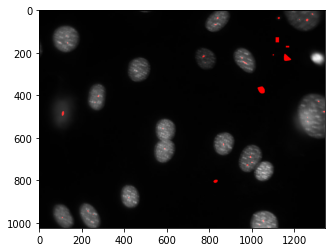

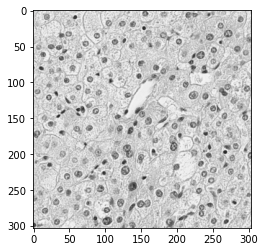

In [83]:
# Sigma = 8
sigma = 8
dnaf = mh.gaussian_filter(dna, sigma)
dnaf = dnaf.astype(dna.dtype)
rmax = mh.regmax(dnaf)
pylab.imshow(mh.overlay(dna, rmax))
pylab.show()

# Sigma = 8
sigma = 8
dnaf = mh.gaussian_filter(dna, sigma)
dnaf = dnaf.astype(dna.dtype)
rmax = mh.regmax(cells_red)
pylab.imshow(mh.overlay(cells_red, rmax))
pylab.show()

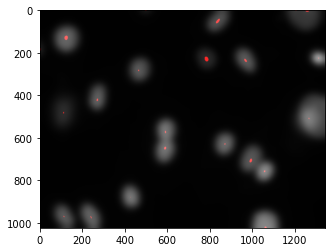

In [41]:
# Sigma = 16
sigma = 16
dnaf = mh.gaussian_filter(dna, sigma).astype(dna.dtype)
rmax = mh.regmax(dnaf)
pylab.imshow(mh.overlay(dnaf, rmax))

In [44]:
rmax = mh.regmax(dnaf)
seeds,nr_nuclei = mh.label(rmax)
print('Number of nuclei:', nr_nuclei)

Number of nuclei: 22


## Watershed

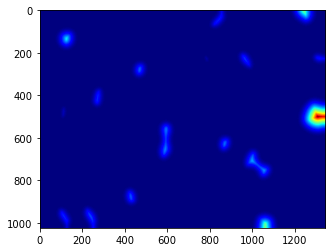

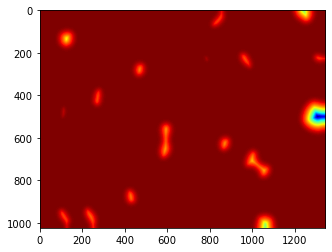

In [49]:
# Sigma = 16
T = mh.thresholding.otsu(dnaf)
dist = mh.distance(dnaf > T)
pylab.imshow(dist)
pylab.show()
dist = dist.max() - dist
dist -= dist.min()
dist = dist/float(dist.ptp()) * 255
dist = dist.astype(np.uint8)
pylab.imshow(dist)
pylab.show()

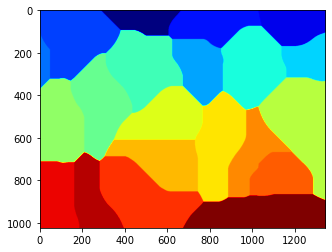

In [50]:
nuclei = mh.cwatershed(dist, seeds)
pylab.imshow(nuclei)
pylab.show()
# whole = mh.segmentation.gvoronoi(nuclei)
# pylab.imshow(whole)
# pylab.show()